# <font color='blue'>Project- CCPS 844 Data Mining</font>
# <font color='green'>Salman AlMaskati</font>


**This project aims to tackle a challenging regression problem focused on predicting life expectancy. Life expectancy is a critical indicator of the overall health and well-being of a population, and accurately predicting it can have far-reaching implications for public health, social policies, and resource allocation.**\
\
**The key steps of the project involve data cleaning, visualizations, Clustering, feature selection and PCA, model training and evaluation. Several regression learning algorithms will be explored and compared to find the best-performing model.**

# <h1> Table of Contents </h1>
# <h4> <a href="#summary"> Data Summary</a> </h4>
# <h4> <a href="#webScraping">&emsp; Web Scraping</a> </h4>
# <h4> <a href="#DataPreprocessing"> &emsp; &emsp;Data Preprocessing</a> </h4>
# <h4> <a href="#Visualizations">&emsp;&emsp;&emsp;Visualizations</a> </h4>
# <h4> <a href="#EDA">&emsp;&emsp;&emsp;&emsp;EDA, Clustering</a> </h4>
# <h4> <a href="#FeatureElimination">&emsp;&emsp;&emsp;&emsp;&emsp;Feature Elimination (RFECV)</a> </h4>
# <h4> <a href="#PCA">&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;PCA</a> </h4>
# <h4> <a href="#spliting">&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Spliting Data</a> </h4>
# <h4> <a href="#regression">&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Regression </a> </h4>
# <h4> <a href="#f_summary">&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Regression algorithms Summary </a> </h4>
# <h4> <a href="#report">&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Report</a> </h4>



# <h3 id="summary"> Data summary </h3>

In [1]:
import pandas as pd

df=pd.read_csv("world-data-2023.csv")
df

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,32,VE,24.50%,"912,050","343,000",17.88,58.0,Caracas,"164,175",...,45.80%,1.92,"28,515,829",59.70%,NaN,73.30%,8.80%,"25,162,368",6.423750,-66.589730
191,Vietnam,314,VN,39.30%,"331,210","522,000",16.75,84.0,Hanoi,"192,668",...,43.50%,0.82,"96,462,106",77.40%,19.10%,37.60%,2.01%,"35,332,140",14.058324,108.277199
192,Yemen,56,YE,44.60%,"527,968","40,000",30.45,967.0,Sanaa,"10,609",...,81.00%,0.31,"29,161,922",38.00%,NaN,26.60%,12.91%,"10,869,523",15.552727,48.516388
193,Zambia,25,ZM,32.10%,"752,618","16,000",36.19,260.0,Lusaka,"5,141",...,27.50%,1.19,"17,861,030",74.60%,16.20%,15.60%,11.43%,"7,871,713",-13.133897,27.849332


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    object 
 2   Abbreviation                               188 non-null    object 
 3   Agricultural Land( %)                      188 non-null    object 
 4   Land Area(Km2)                             194 non-null    object 
 5   Armed Forces size                          171 non-null    object 
 6   Birth Rate                                 189 non-null    float64
 7   Calling Code                               194 non-null    float64
 8   Capital/Major City                         192 non-null    object 
 9   Co2-Emissions                              188 non-null    object 
 10  CPI                       

In [3]:
df.describe()

,Birth Rate,Calling Code,Fertility Rate,Infant mortality,Life expectancy,Maternal mortality ratio,Physicians per thousand,Latitude,Longitude
count,189.000000,194.000000,188.000000,189.000000,187.000000,181.000000,188.000000,194.000000,194.000000
mean,20.214974,360.546392,2.698138,21.332804,72.279679,160.392265,1.839840,19.092351,20.232434
std,9.945774,323.236419,1.282267,19.548058,7.483661,233.502024,1.684261,23.961779,66.716110
min,5.900000,1.000000,0.980000,1.400000,52.800000,2.000000,0.010000,-40.900557,-175.198242
25%,11.300000,82.500000,1.705000,6.000000,67.000000,13.000000,0.332500,4.544175,-7.941496
50%,17.950000,255.500000,2.245000,14.000000,73.200000,53.000000,1.460000,17.273849,20.972652
75%,28.750000,506.750000,3.597500,32.700000,77.500000,186.000000,2.935000,40.124603,48.281523
max,46.080000,1876.000000,6.910000,84.500000,85.400000,1150.000000,8.420000,64.963051,178.065032


Droping columns that do not add value to the df

In [4]:
cols_to_drop= ['Abbreviation','Calling Code','Capital/Major City','Currency-Code','Largest city','Official language','Maternal mortality ratio','Gross primary education enrollment (%)','Gross tertiary education enrollment (%)','Latitude','Longitude']
df = df.drop(columns=cols_to_drop)
df

,Country,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,...,Life expectancy,Minimum wage,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population
0,Afghanistan,60,58.10%,"652,230","323,000",32.49,"8,672",149.9,2.30%,4.47,...,64.5,$0.43,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273"
1,Albania,105,43.10%,"28,748","9,000",11.78,"4,536",119.05,1.40%,1.62,...,78.5,$1.12,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593"
2,Algeria,18,17.40%,"2,381,741","317,000",24.28,"150,006",151.36,2.00%,3.02,...,76.7,$0.95,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100"
3,Andorra,164,40.00%,468,NaN,7.20,469,NaN,NaN,1.27,...,NaN,$6.63,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873"
4,Angola,26,47.50%,"1,246,700","117,000",40.73,"34,693",261.73,17.10%,5.52,...,60.8,$0.71,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,32,24.50%,"912,050","343,000",17.88,"164,175","2,740.27",254.90%,2.27,...,72.1,$0.01,45.80%,1.92,"28,515,829",59.70%,NaN,73.30%,8.80%,"25,162,368"
191,Vietnam,314,39.30%,"331,210","522,000",16.75,"192,668",163.52,2.80%,2.05,...,75.3,$0.73,43.50%,0.82,"96,462,106",77.40%,19.10%,37.60%,2.01%,"35,332,140"
192,Yemen,56,44.60%,"527,968","40,000",30.45,"10,609",157.58,8.10%,3.79,...,66.1,NaN,81.00%,0.31,"29,161,922",38.00%,NaN,26.60%,12.91%,"10,869,523"
193,Zambia,25,32.10%,"752,618","16,000",36.19,"5,141",212.31,9.20%,4.63,...,63.5,$0.24,27.50%,1.19,"17,861,030",74.60%,16.20%,15.60%,11.43%,"7,871,713"


In [5]:
df.shape

(195, 24)

Visualizing NA's

The Number of NA's in Country                                       0
Density\n(P/Km2)                              0
Agricultural Land( %)                         7
Land Area(Km2)                                1
Armed Forces size                            24
Birth Rate                                    6
Co2-Emissions                                 7
CPI                                          17
CPI Change (%)                               16
Fertility Rate                                7
Forested Area (%)                             7
Gasoline Price                               20
GDP                                           2
Infant mortality                              6
Life expectancy                               8
Minimum wage                                 45
Out of pocket health expenditure              7
Physicians per thousand                       7
Population                                    1
Population: Labor force participation (%)    19
Tax revenue (%)   

Text(0.5, 1.0, "Visualizing NA's")

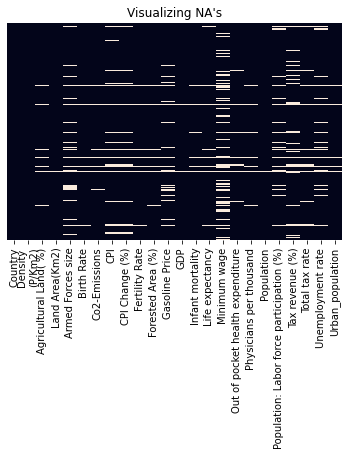

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

na_counts = df.isna().sum()
print("The Number of NA's in",na_counts)

sns.heatmap(df.isnull(),yticklabels=False,cbar=False)
plt.title("Visualizing NA's")



# <h3 id="webScraping"> Web Scraping </h3>


***Fill in Agricultural Land( %) values***

In [7]:
from lxml import html
from bs4 import BeautifulSoup
import requests


In [8]:
#Find Out which countries have missing Agricultural Land( %) values
rows_with_na = df[df["Agricultural Land( %)"].isna()]

# Display the result
print(rows_with_na)

print("Eswatini, Monaco, Nauru, North Macedonia, Palestinian National Authority, South Sudan")

                            Country Density\n(P/Km2) Agricultural Land( %)  \
56                         Eswatini               67                   NaN   
73                     Vatican City            2,003                   NaN   
113                          Monaco           26,337                   NaN   
120                           Nauru              541                   NaN   
128                 North Macedonia               83                   NaN   
133  Palestinian National Authority              847                   NaN   
163                     South Sudan               18                   NaN   

    Land Area(Km2) Armed Forces size  Birth Rate Co2-Emissions       CPI  \
56          17,364               NaN         NaN           NaN       NaN   
73               0               NaN         NaN           NaN       NaN   
113              2               NaN        5.90           NaN       NaN   
120             21               NaN         NaN           NaN       Na

In [9]:
#get agricultral land data
import requests

from bs4 import BeautifulSoup


In [10]:
url = 'https://wdi.worldbank.org/table/3.2'

# end a GET request to the URL
response = requests.get(url)
html_content = response.text

# create a Beautiful Soup object
soup = BeautifulSoup(html_content, 'html.parser')

country_elements = soup.find_all(class_="country")

#Eswatini %
for country_element in country_elements:
    country_content = country_element.get_text()

    if "Eswatini" in country_content:
        row_element = country_element.find_parent("tr")
        if row_element:
            eswatini_row = row_element.get_text()
            #print("Row:", eswatini_row)

#Monaco %
for country_element in country_elements:
    country_content = country_element.get_text()

    if "Monaco" in country_content:
        row_element = country_element.find_parent("tr")
        if row_element:
            monaco_row = row_element.get_text()
            #print("Row:", monaco_row)

#Nauru %
for country_element in country_elements:
    country_content = country_element.get_text()

    if "North Macedonia" in country_content:
        row_element = country_element.find_parent("tr")
        if row_element:
            nm_row = row_element.get_text()
            #print("Row:", nm_row)

#South Sudan %
for country_element in country_elements:
    country_content = country_element.get_text()

    if "South Sudan" in country_content:
        row_element = country_element.find_parent("tr")
        if row_element:
            ss_row = row_element.get_text()
            #print("Row:", ss_row)

print("Nauru, Vatican City, and Moanco, could not be found\nPalestinian National Authority(will be dropped due to lack of data)")

# helper function to format extaracted data
def get_first_number(words):
    for word in words:
        if word.replace('.', '', 1).isdigit():  # formating
            return float(word)


# split the rows by whitespaces
nm_words = nm_row.split()
ss_words = ss_row.split()
eswatini_words = eswatini_row.split()

# create  dictionary
data_dict = {
    'North Macedonia': get_first_number(nm_words),
    'South Sudan': get_first_number(ss_words),
    'Eswatini': get_first_number(eswatini_words)
}

print(data_dict)



Nauru, Vatican City, and Moanco, could not be found
Palestinian National Authority(will be dropped due to lack of data)
{'North Macedonia': 50.0, 'South Sudan': 45.0, 'Eswatini': 71.0}


In [11]:
#input values to df
df.loc[df['Country'] == 'North Macedonia', 'Agricultural Land( %)'] = get_first_number(nm_words)
df.loc[df['Country'] == 'South Sudan', 'Agricultural Land( %)'] = get_first_number(ss_words)
df.loc[df['Country'] == 'Eswatini', 'Agricultural Land( %)'] = get_first_number(eswatini_words)


# <h3 id="DataPreprocessing"> Data Preprocessing </h3>


Replace '0' in all rows with NA

In [12]:
import numpy as np
df = df.replace(0, np.nan)

The Number of NA's in Country                                       0
Density\n(P/Km2)                              0
Agricultural Land( %)                         4
Land Area(Km2)                                1
Armed Forces size                            24
Birth Rate                                    6
Co2-Emissions                                 7
CPI                                          17
CPI Change (%)                               16
Fertility Rate                                7
Forested Area (%)                             7
Gasoline Price                               20
GDP                                           2
Infant mortality                              6
Life expectancy                               8
Minimum wage                                 45
Out of pocket health expenditure              7
Physicians per thousand                       7
Population                                    1
Population: Labor force participation (%)    19
Tax revenue (%)   

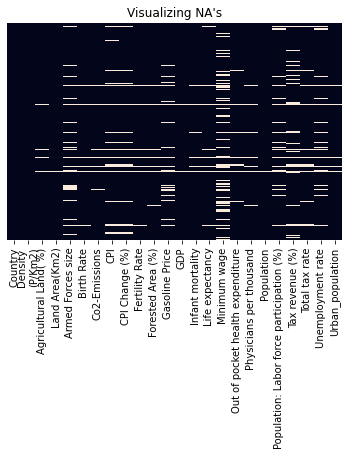

In [13]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)
plt.title("Visualizing NA's")
na_counts = df.isna().sum()
print("The Number of NA's in",na_counts)

Drop Minumum Wage column due to lack of data

In [14]:
df.drop(columns='Minimum wage', inplace=True)


Drop ROWS that have NA values

In [15]:
df = df.dropna(axis=0)


In [16]:
print(df.isnull().sum())

Country                                      0
Density\n(P/Km2)                             0
Agricultural Land( %)                        0
Land Area(Km2)                               0
Armed Forces size                            0
Birth Rate                                   0
Co2-Emissions                                0
CPI                                          0
CPI Change (%)                               0
Fertility Rate                               0
Forested Area (%)                            0
Gasoline Price                               0
GDP                                          0
Infant mortality                             0
Life expectancy                              0
Out of pocket health expenditure             0
Physicians per thousand                      0
Population                                   0
Population: Labor force participation (%)    0
Tax revenue (%)                              0
Total tax rate                               0
Unemployment 

In [17]:
df.shape

(146, 23)

Text(0.5, 1.0, "Visualizing NA's")

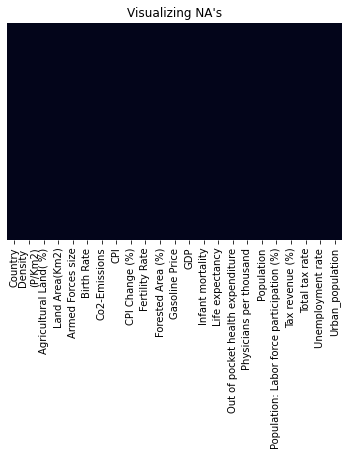

In [18]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)
plt.title("Visualizing NA's")

change data types 'object' to 'float64' so we can fit the dataframe into machine learning algorithms

In [19]:
df.dtypes


Country                                       object
Density\n(P/Km2)                              object
Agricultural Land( %)                         object
Land Area(Km2)                                object
Armed Forces size                             object
Birth Rate                                   float64
Co2-Emissions                                 object
CPI                                           object
CPI Change (%)                                object
Fertility Rate                               float64
Forested Area (%)                             object
Gasoline Price                                object
GDP                                           object
Infant mortality                             float64
Life expectancy                              float64
Out of pocket health expenditure              object
Physicians per thousand                      float64
Population                                    object
Population: Labor force participation (%)     

In [20]:
#Changing columns data types

#remove commas from Density column
df['Density\n(P/Km2)'] = df['Density\n(P/Km2)'].str.replace(',', '')
df['Density\n(P/Km2)'] = df['Density\n(P/Km2)'].astype(float)

#remove (%) from Agricultural Land(%) column
df['Agricultural Land( %)'] = df['Agricultural Land( %)'].str.replace('%', '')
df['Agricultural Land( %)'] = df['Agricultural Land( %)'].astype(float)


#remove commas from Land Area(Km2) column
df['Land Area(Km2)'] = df['Land Area(Km2)'].str.replace(',', '')
df['Land Area(Km2)'] = df['Land Area(Km2)'].astype(float)

#remove commas from Armed Forces size column
df['Armed Forces size'] = df['Armed Forces size'].str.replace(',', '')
df['Armed Forces size'] = df['Armed Forces size'].astype(float)

#remove commas from Co2-Emissions column
df['Co2-Emissions'] = df['Co2-Emissions'].str.replace(',', '')
df['Co2-Emissions'] = df['Co2-Emissions'].astype(float)

#remove commas from CPI column
df['CPI'] = df['CPI'].str.replace(',', '')
df['CPI'] = df['CPI'].astype(float)

#remove "%" from CPI Change column
df['CPI Change (%)'] = df['CPI Change (%)'].str.replace('%', '')
df['CPI Change (%)'] = df['CPI Change (%)'].astype(float)

#remove "%" from Forested Area (%) column
df['Forested Area (%)'] = df['Forested Area (%)'].str.replace('%', '')
df['Forested Area (%)'] = df['Forested Area (%)'].astype(float)

#remove "$" from Gasoline Price column
df['Gasoline Price'] = df['Gasoline Price'].str.replace('$', '')
df['Gasoline Price'] = df['Gasoline Price'].astype(float)

#remove "$" from GDP Change column
df['GDP'] = df['GDP'].str.replace('$', '')
#remove commas from GDP Change column
df['GDP'] = df['GDP'].str.replace(',', '')
df['GDP'] = df['GDP'].astype(float)
#Pandas formats large number to scinetifc notation, therfore this converts back
pd.set_option('display.float_format', '{:.2f}'.format)

#remove "%" from Out of pocket health expenditure column
df['Out of pocket health expenditure'] = df['Out of pocket health expenditure'].str.replace('%', '')
df['Out of pocket health expenditure'] = df['Out of pocket health expenditure'].astype(float)

#remove commas from Population column
df['Population'] = df['Population'].str.replace(',', '')
df['Population'] = df['Population'].astype(float)

#remove "%" from Population: Labor force participation (%) column
df['Population: Labor force participation (%)'] = df['Population: Labor force participation (%)'].str.replace('%', '')
df['Population: Labor force participation (%)'] = df['Population: Labor force participation (%)'].astype(float)

#remove "%" from Tax revenue (%) column
df['Tax revenue (%)'] = df['Tax revenue (%)'].str.replace('%', '')
df['Tax revenue (%)'] = df['Tax revenue (%)'].astype(float)

#remove "%" from Total tax rate column
df['Total tax rate'] = df['Total tax rate'].str.replace('%', '')
df['Total tax rate'] = df['Total tax rate'].astype(float)

#remove "%" from Unemployment rate column
df['Unemployment rate'] = df['Unemployment rate'].str.replace('%', '')
df['Unemployment rate'] = df['Unemployment rate'].astype(float)

#remove commas from Urban_population column
df['Urban_population'] = df['Urban_population'].str.replace(',', '')
df['Urban_population'] = df['Urban_population'].astype(float)

#turn life expenctancy into into so it can be used as a TARGET variable
df['Life expectancy'] = df['Life expectancy'].astype(int)



C:\Users\almas\AppData\Local\Temp/ipykernel_8696/1912219860.py:37: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Gasoline Price'] = df['Gasoline Price'].str.replace('$', '')
C:\Users\almas\AppData\Local\Temp/ipykernel_8696/1912219860.py:41: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['GDP'] = df['GDP'].str.replace('$', '')


All NUMERIC columns that were data type 'object' are now changed to 'float64'. Target Varible 'Life Expectancy' is changed into 'int32'

In [21]:
df.dtypes

Country                                       object
Density\n(P/Km2)                             float64
Agricultural Land( %)                        float64
Land Area(Km2)                               float64
Armed Forces size                            float64
Birth Rate                                   float64
Co2-Emissions                                float64
CPI                                          float64
CPI Change (%)                               float64
Fertility Rate                               float64
Forested Area (%)                            float64
Gasoline Price                               float64
GDP                                          float64
Infant mortality                             float64
Life expectancy                                int32
Out of pocket health expenditure             float64
Physicians per thousand                      float64
Population                                   float64
Population: Labor force participation (%)    f

In [22]:
df

,Country,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,...,Infant mortality,Life expectancy,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population
0,Afghanistan,60.00,58.10,652230.00,323000.00,32.49,8672.00,149.90,2.30,4.47,...,47.90,64,78.40,0.28,38041754.00,48.90,9.30,71.40,11.12,9797273.00
1,Albania,105.00,43.10,28748.00,9000.00,11.78,4536.00,119.05,1.40,1.62,...,7.80,78,56.90,1.20,2854191.00,55.70,18.60,36.60,12.33,1747593.00
2,Algeria,18.00,17.40,2381741.00,317000.00,24.28,150006.00,151.36,2.00,3.02,...,20.10,76,28.10,1.72,43053054.00,41.20,37.20,66.10,11.70,31510100.00
4,Angola,26.00,47.50,1246700.00,117000.00,40.73,34693.00,261.73,17.10,5.52,...,51.60,60,33.40,0.21,31825295.00,77.50,9.20,49.10,6.89,21061025.00
6,Argentina,17.00,54.30,2780400.00,105000.00,17.02,201348.00,232.75,53.50,2.26,...,8.80,76,17.60,3.96,44938712.00,61.30,10.10,106.30,9.79,41339571.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,United States,36.00,44.40,9833517.00,1359000.00,11.60,5006302.00,117.24,7.50,1.73,...,5.60,78,11.10,2.61,328239523.00,62.00,9.60,36.60,14.70,270663028.00
187,Uruguay,20.00,82.60,176215.00,22000.00,13.86,6766.00,202.92,7.90,1.97,...,6.40,77,16.20,5.05,3461734.00,64.00,20.10,41.80,8.73,3303394.00
191,Vietnam,314.00,39.30,331210.00,522000.00,16.75,192668.00,163.52,2.80,2.05,...,16.50,75,43.50,0.82,96462106.00,77.40,19.10,37.60,2.01,35332140.00
193,Zambia,25.00,32.10,752618.00,16000.00,36.19,5141.00,212.31,9.20,4.63,...,40.40,63,27.50,1.19,17861030.00,74.60,16.20,15.60,11.43,7871713.00


# <h3 id="Visualizations">Visualizations</h3>

Correlation matrix in text and heatmap (to idenitfy relationships and to help with feature selection)

Correlation Heatmap (Text Representation):
                                           Density\n(P/Km2)  Agricultural Land( %)  Land Area(Km2)  Armed Forces size  Birth Rate  Co2-Emissions   CPI  CPI Change (%)  Fertility Rate  Forested Area (%)  Gasoline Price   GDP  Infant mortality  Life expectancy  Out of pocket health expenditure  Physicians per thousand  Population  Population: Labor force participation (%)  Tax revenue (%)  Total tax rate  Unemployment rate  Urban_population
Density\n(P/Km2)                                       1.00                  -0.14           -0.09              -0.01       -0.15          -0.02 -0.06           -0.08           -0.15              -0.12            0.10 -0.01             -0.12             0.18                              0.03                     0.03        0.00                                       0.07            -0.05           -0.16              -0.12             -0.01
Agricultural Land( %)                                 -0.14            

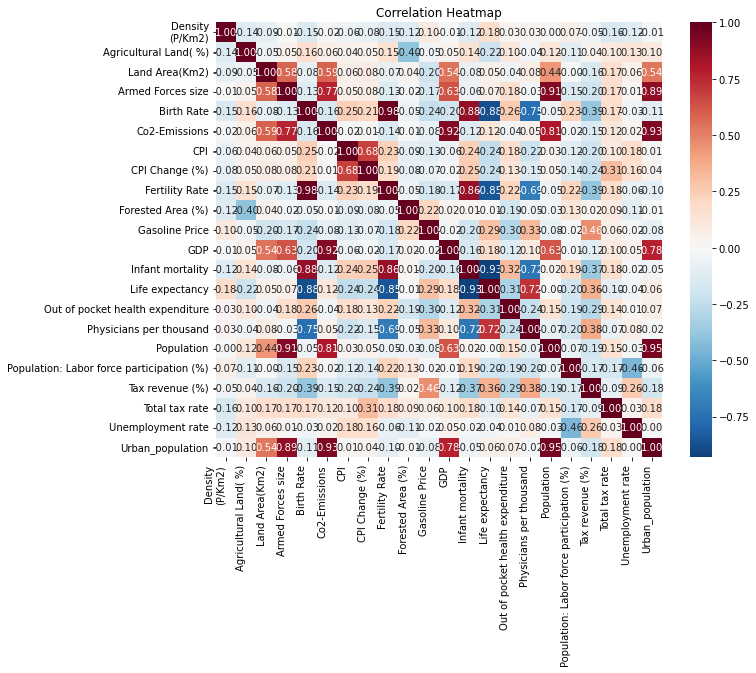

In [23]:
#correlation matrix
correlation_matrix = df.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, fmt='.2f',
            xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)
plt.title('Correlation Heatmap')
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)


# Convert heatmap to text representaion
correlation_text = correlation_matrix.to_string(float_format="{:.2f}".format)

print("Correlation Heatmap (Text Representation):")
print(correlation_text)

plt.show()

Text(0.5, 1.0, 'Armed Forces size vs. Population')

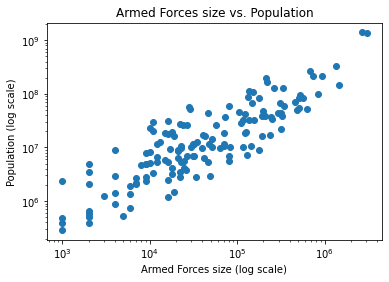

In [24]:
#scatter plot with a logarithmic scale
plt.scatter(x=df['Armed Forces size'], y=df['Population'])
plt.xscale('log')
plt.yscale('log')

# labels
plt.xlabel('Armed Forces size (log scale)')
plt.ylabel('Population (log scale)')

plt.title('Armed Forces size vs. Population')


Bar graph of top 7 most populated countries

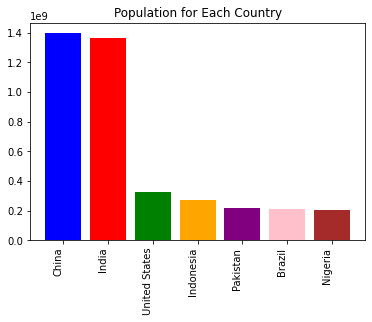

In [25]:
plt.bar(df.sort_values(by="Population",ascending=False).head(7)["Country"],
        df.sort_values(by="Population",ascending=False).head(7)["Population"],
        color=['blue','red','green','orange','purple','pink','brown'])

plt.xticks(rotation=90, ha='right')
plt.title('Population for Each Country')
plt.show()

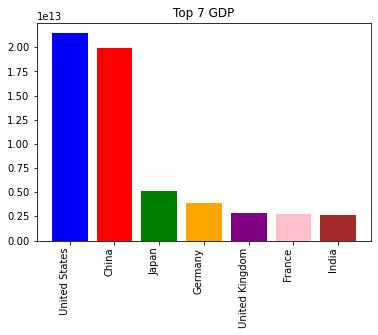

In [26]:
plt.bar(df.sort_values(by="GDP",ascending=False).head(7)["Country"],
        df.sort_values(by="GDP",ascending=False).head(7)["GDP"],
        color=['blue','red','green','orange','purple','pink','brown'])

plt.xticks(rotation=90, ha='right')
plt.title('Top 7 GDP')
plt.show()

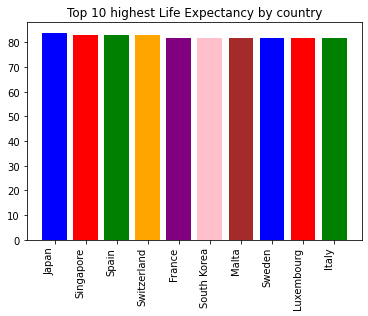

In [27]:
plt.bar(df.sort_values(by="Life expectancy",ascending=False).head(10)["Country"],
        df.sort_values(by="Life expectancy",ascending=False).head(10)["Life expectancy"],
        color=['blue','red','green','orange','purple','pink','brown'])

plt.xticks(rotation=90, ha='right')
plt.title('Top 10 highest Life Expectancy by country')

plt.show()

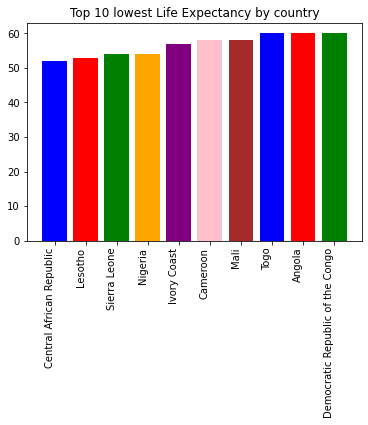

In [28]:
plt.bar(df.sort_values(by="Life expectancy",ascending=True).head(10)["Country"],
        df.sort_values(by="Life expectancy",ascending=True).head(10)["Life expectancy"],
        color=['blue','red','green','orange','purple','pink','brown'])

plt.xticks(rotation=90, ha='right')
plt.title('Top 10 lowest Life Expectancy by country')
plt.show()

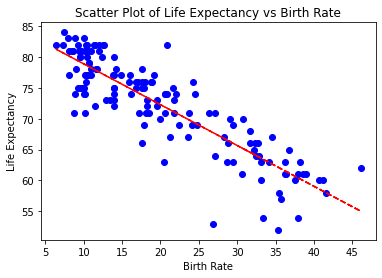

In [29]:
birth_rate = df['Birth Rate']
life_expectancy = df['Life expectancy']

plt.scatter(birth_rate, life_expectancy, color='blue')
plt.xlabel('Birth Rate')
plt.ylabel('Life Expectancy')
plt.title('Scatter Plot of Life Expectancy vs Birth Rate')


# Add best fit line

#get coefficents for best fit
coefficients = np.polyfit(birth_rate, life_expectancy, 1)
#equation of best fit line
polynomial = np.poly1d(coefficients)
plt.plot(birth_rate, polynomial(birth_rate), color='red', linestyle='--', label='Line of Best Fit')

plt.show()

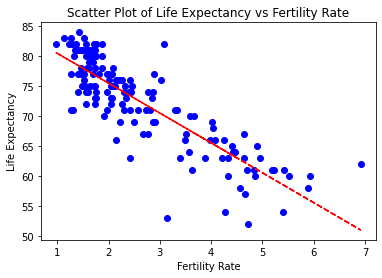

In [30]:
fertility_rate = df['Fertility Rate']
life_expectancy = df['Life expectancy']

plt.scatter(fertility_rate, life_expectancy, color='blue')
plt.xlabel('Fertility Rate')
plt.ylabel('Life Expectancy')
plt.title('Scatter Plot of Life Expectancy vs Fertility Rate')

# Add a line of best fit

coefficients = np.polyfit(fertility_rate, life_expectancy, 1)
polynomial = np.poly1d(coefficients)
plt.plot(fertility_rate, polynomial(fertility_rate), color='red', linestyle='--', label='Line of Best Fit')


plt.show()

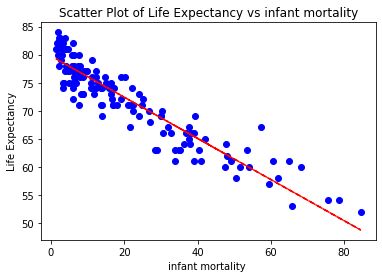

In [31]:
infant_mortality  = df['Infant mortality']
life_expectancy = df['Life expectancy']

plt.scatter(infant_mortality, life_expectancy, color='blue')
plt.xlabel('infant mortality ')
plt.ylabel('Life Expectancy')
plt.title('Scatter Plot of Life Expectancy vs infant mortality')

# Add best fit line
coefficients = np.polyfit(infant_mortality, life_expectancy, 1)
polynomial = np.poly1d(coefficients)
plt.plot(infant_mortality, polynomial(infant_mortality), color='red', linestyle='--')

plt.show()

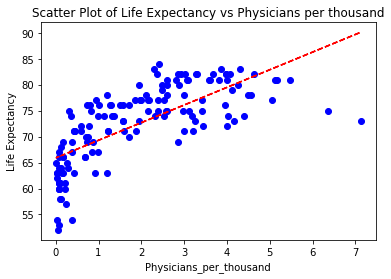

In [32]:
Physicians_per_thousand  = df['Physicians per thousand']
life_expectancy = df['Life expectancy']

# Create a scatter plot
plt.scatter(Physicians_per_thousand, life_expectancy, color='blue')
plt.xlabel('Physicians_per_thousand')
plt.ylabel('Life Expectancy')
plt.title('Scatter Plot of Life Expectancy vs Physicians per thousand')


# Add a line of best fit
coefficients = np.polyfit(Physicians_per_thousand, life_expectancy, 1)
polynomial = np.poly1d(coefficients)
plt.plot(Physicians_per_thousand, polynomial(Physicians_per_thousand), color='red', linestyle='--', label='Line of Best Fit')


# <h3 id="EDA">EDA, Clustering</h3>

Hierarchical Clustering

In [33]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

We need to seperate Country col from the rest of the df

In [34]:
# remove the 'Country' column from the DataFrame before clustering
numerical_features_df = df.drop(columns=['Country'])
country=df.Country.values


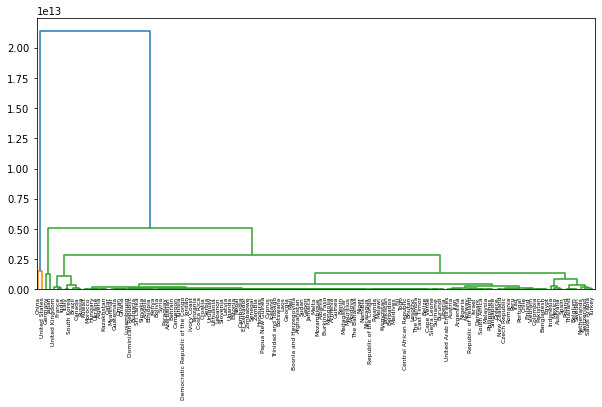

In [35]:
mergings = linkage(numerical_features_df, method='complete')
plt.figure(figsize=(10, 5))

dendrogram(mergings,
           labels=country,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()


# <h3 id="FeatureElimination">Feature Elimination</h3>

Recursive Feature Elimination Cross Validation to reduce features to find out the most important ones

In [36]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
%matplotlib inline

In [37]:
from sklearn.linear_model import LogisticRegression
#max_iter to make sure algorithm reaches convergence
logit=LogisticRegression(multi_class='ovr',solver='lbfgs',max_iter=200000)

Set X and y to features and target

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=df.drop(columns=['Country','Life expectancy'])
y=df['Life expectancy']

X

,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),...,GDP,Infant mortality,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population
0,60.00,58.10,652230.00,323000.00,32.49,8672.00,149.90,2.30,4.47,2.10,...,19101353833.00,47.90,78.40,0.28,38041754.00,48.90,9.30,71.40,11.12,9797273.00
1,105.00,43.10,28748.00,9000.00,11.78,4536.00,119.05,1.40,1.62,28.10,...,15278077447.00,7.80,56.90,1.20,2854191.00,55.70,18.60,36.60,12.33,1747593.00
2,18.00,17.40,2381741.00,317000.00,24.28,150006.00,151.36,2.00,3.02,0.80,...,169988236398.00,20.10,28.10,1.72,43053054.00,41.20,37.20,66.10,11.70,31510100.00
4,26.00,47.50,1246700.00,117000.00,40.73,34693.00,261.73,17.10,5.52,46.30,...,94635415870.00,51.60,33.40,0.21,31825295.00,77.50,9.20,49.10,6.89,21061025.00
6,17.00,54.30,2780400.00,105000.00,17.02,201348.00,232.75,53.50,2.26,9.80,...,449663446954.00,8.80,17.60,3.96,44938712.00,61.30,10.10,106.30,9.79,41339571.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,36.00,44.40,9833517.00,1359000.00,11.60,5006302.00,117.24,7.50,1.73,33.90,...,21427700000000.00,5.60,11.10,2.61,328239523.00,62.00,9.60,36.60,14.70,270663028.00
187,20.00,82.60,176215.00,22000.00,13.86,6766.00,202.92,7.90,1.97,10.70,...,56045912952.00,6.40,16.20,5.05,3461734.00,64.00,20.10,41.80,8.73,3303394.00
191,314.00,39.30,331210.00,522000.00,16.75,192668.00,163.52,2.80,2.05,48.10,...,261921244843.00,16.50,43.50,0.82,96462106.00,77.40,19.10,37.60,2.01,35332140.00
193,25.00,32.10,752618.00,16000.00,36.19,5141.00,212.31,9.20,4.63,65.20,...,23064722446.00,40.40,27.50,1.19,17861030.00,74.60,16.20,15.60,11.43,7871713.00


RFECV without scaling X (we get a warning if we dont scale the data, beacuse the algorthim is having difficulty reaching ***convergance***)

In [ ]:
# Reduced number of splits and 'roc_auc' scoring
rfecv = RFECV(estimator=logit, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X, y)

In [40]:
print(f"Optimal number of features : {rfecv.n_features_}")


Optimal number of features : 3


3 features yields the highest cross validation score

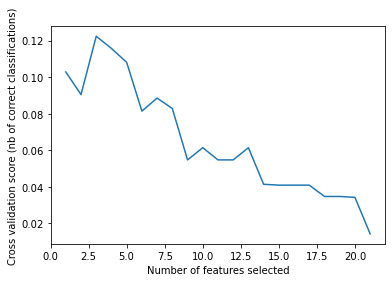

In [41]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [42]:
print(rfecv.support_)
print("Selected Features: ",X.columns[rfecv.support_])

[False False False False  True False False False  True False False False
 False False  True False False False False False False]
Selected Features:  Index(['Birth Rate', 'Fertility Rate', 'Physicians per thousand'], dtype='object')


Ranking = 1 means that RFECV has chosen the feature

In [43]:
rfecv.ranking_

array([12,  9, 15, 14,  1, 13, 11,  4,  1, 10, 18, 19,  2,  8,  1, 17,  5,
        6,  7,  3, 16])

RFECV with sacling X, to make sure the algorithm reaches convergence

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
rfecv = RFECV(estimator=logit, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X_scaled, y)

c:\Users\almas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=LogisticRegression(max_iter=200000, multi_class='ovr'),
      scoring='accuracy')

In [45]:
print(f"Optimal number of features : {rfecv.n_features_}")
selected_features= X.columns[rfecv.support_]
print("Selected Features: ",selected_features)

#create a df using the selected features
selected_features_df = X[selected_features]
selected_features_df


Optimal number of features : 16
Selected Features:  Index(['Agricultural Land( %)', 'Land Area(Km2)', 'Armed Forces size',
       'Birth Rate', 'CPI', 'CPI Change (%)', 'Fertility Rate',
       'Forested Area (%)', 'Gasoline Price', 'Infant mortality',
       'Out of pocket health expenditure', 'Physicians per thousand',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate'],
      dtype='object')


,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,CPI,CPI Change (%),Fertility Rate,Forested Area (%),Gasoline Price,Infant mortality,Out of pocket health expenditure,Physicians per thousand,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate
0,58.10,652230.00,323000.00,32.49,149.90,2.30,4.47,2.10,0.70,47.90,78.40,0.28,48.90,9.30,71.40,11.12
1,43.10,28748.00,9000.00,11.78,119.05,1.40,1.62,28.10,1.36,7.80,56.90,1.20,55.70,18.60,36.60,12.33
2,17.40,2381741.00,317000.00,24.28,151.36,2.00,3.02,0.80,0.28,20.10,28.10,1.72,41.20,37.20,66.10,11.70
4,47.50,1246700.00,117000.00,40.73,261.73,17.10,5.52,46.30,0.97,51.60,33.40,0.21,77.50,9.20,49.10,6.89
6,54.30,2780400.00,105000.00,17.02,232.75,53.50,2.26,9.80,1.10,8.80,17.60,3.96,61.30,10.10,106.30,9.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,44.40,9833517.00,1359000.00,11.60,117.24,7.50,1.73,33.90,0.71,5.60,11.10,2.61,62.00,9.60,36.60,14.70
187,82.60,176215.00,22000.00,13.86,202.92,7.90,1.97,10.70,1.50,6.40,16.20,5.05,64.00,20.10,41.80,8.73
191,39.30,331210.00,522000.00,16.75,163.52,2.80,2.05,48.10,0.80,16.50,43.50,0.82,77.40,19.10,37.60,2.01
193,32.10,752618.00,16000.00,36.19,212.31,9.20,4.63,65.20,1.40,40.40,27.50,1.19,74.60,16.20,15.60,11.43


16 features yields the highest cross validation score

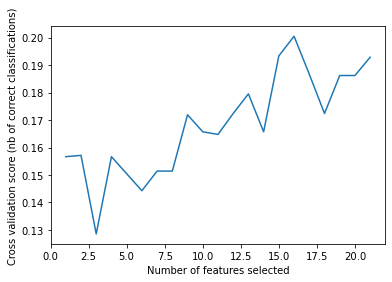

In [46]:
#plot CV score with number of features selected
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

# <h3 id="PCA">PCA</h3>


Dimensionality reduction algorithm on ***selcted_features_df***, to reduce the dimensions of the dataframe


In [47]:
from sklearn.decomposition import PCA
pca_Object = PCA(n_components=16)
pca_Object.fit(X_scaled)
pca_X = pca_Object.transform(X)

In [48]:
#The amount of variance that each PC explains
var_Data= pca_Object.explained_variance_ratio_
#Cumulative Variance explains
var1_Data=np.cumsum(np.round(pca_Object.explained_variance_ratio_, decimals=4)*100)
var1_Data


array([23.18, 43.54, 53.4 , 60.61, 67.18, 72.32, 77.35, 81.87, 85.34,
       87.98, 90.24, 92.47, 94.52, 96.21, 97.57, 98.71])

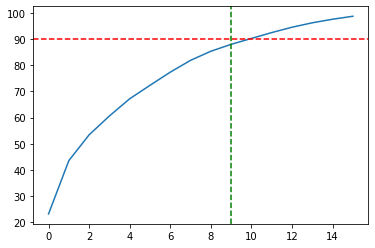

In [49]:
plt.plot(var1_Data)
plt.axhline(y=90, color='red', linestyle='--')
plt.axvline(x=9, color='green', linestyle='--')
plt.show()

Selecting features that have > 90% of the variance (9 features in this case)

In [51]:
from sklearn.decomposition import PCA
from sklearn import decomposition

pcaOBJ = decomposition.PCA(n_components=9)
pcaOBJ.fit(pca_X)
obj = pcaOBJ.transform(pca_X)
print("obj shape: ",obj.shape)
obj


obj shape:  (146, 9)


array([[-4.87493786e+11,  7.29694423e+06, -9.48837518e+04, ...,
        -1.97292447e+02, -1.57562916e+01, -4.40227242e+01],
       [-4.90576478e+11, -1.92718691e+07, -5.03016090e+05, ...,
        -1.34243206e+02, -2.79482985e+01, -9.88525772e+00],
       [-3.65685046e+11,  1.47602551e+07,  1.98171091e+06, ...,
        -1.47821908e+02, -2.85436096e+01, -1.51489105e+01],
       ...,
       [-2.91477272e+11,  4.78513204e+07, -6.13503980e+05, ...,
         1.94506550e+01, -8.08257122e+00,  1.49074173e+01],
       [-4.84291735e+11, -7.01658472e+06,  1.50381783e+05, ...,
        -1.82729399e+02,  5.22851105e+01,  3.78757973e+01],
       [-4.85602729e+11, -1.04848006e+07, -2.28985431e+05, ...,
        -1.91586820e+02, -5.09214783e+01,  6.35052490e+00]])

In [52]:
import pandas as pd

# Convert the 'obj' array into a DataFrame
pca_df = pd.DataFrame(obj)

# Print the DataFrame containing the chosen principal components with updated column names
print(pca_df)


                    0             1           2          3         4  \
0    -487493786286.97    7296944.23   -94883.75  293155.97  25075.00   
1    -490576478144.36  -19271869.06  -503016.09  -38965.69  -7349.40   
2    -365685046327.28   14760255.08  1981710.91 -134068.24  19735.61   
3    -426515000792.43    5499636.44   765716.05 -118533.82   -446.08   
4    -139910852947.05    9360349.40  2375281.85 -338646.30 -10305.89   
..                ...           ...         ...        ...       ...   
141 16794992860626.67 -536659176.46 -1665092.48 3011280.81  40423.10   
142  -457665749541.99  -19774800.46  -351530.98  -51741.36  -5544.30   
143  -291477272304.45   47851320.39  -613503.98  224789.70  40564.44   
144  -484291734611.70   -7016584.72   150381.78   67663.12 -13902.30   
145  -485602729205.39  -10484800.58  -228985.43   83918.12  -7096.85   

            5       6      7      8  
0   -10631.59 -197.29 -15.76 -44.02  
1    -2708.75 -134.24 -27.95  -9.89  
2     -391.50 -147.82

# <h3 id="spliting">Split data into train and test (for both orginal dataframe and PCA dataframe)</h3>


***Split data***

In [53]:
#set X and Y
df.columns
df_X = df.drop(columns=['Life expectancy','Country'])
df_y=df['Life expectancy']
df_X



,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),...,GDP,Infant mortality,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population
0,60.00,58.10,652230.00,323000.00,32.49,8672.00,149.90,2.30,4.47,2.10,...,19101353833.00,47.90,78.40,0.28,38041754.00,48.90,9.30,71.40,11.12,9797273.00
1,105.00,43.10,28748.00,9000.00,11.78,4536.00,119.05,1.40,1.62,28.10,...,15278077447.00,7.80,56.90,1.20,2854191.00,55.70,18.60,36.60,12.33,1747593.00
2,18.00,17.40,2381741.00,317000.00,24.28,150006.00,151.36,2.00,3.02,0.80,...,169988236398.00,20.10,28.10,1.72,43053054.00,41.20,37.20,66.10,11.70,31510100.00
4,26.00,47.50,1246700.00,117000.00,40.73,34693.00,261.73,17.10,5.52,46.30,...,94635415870.00,51.60,33.40,0.21,31825295.00,77.50,9.20,49.10,6.89,21061025.00
6,17.00,54.30,2780400.00,105000.00,17.02,201348.00,232.75,53.50,2.26,9.80,...,449663446954.00,8.80,17.60,3.96,44938712.00,61.30,10.10,106.30,9.79,41339571.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,36.00,44.40,9833517.00,1359000.00,11.60,5006302.00,117.24,7.50,1.73,33.90,...,21427700000000.00,5.60,11.10,2.61,328239523.00,62.00,9.60,36.60,14.70,270663028.00
187,20.00,82.60,176215.00,22000.00,13.86,6766.00,202.92,7.90,1.97,10.70,...,56045912952.00,6.40,16.20,5.05,3461734.00,64.00,20.10,41.80,8.73,3303394.00
191,314.00,39.30,331210.00,522000.00,16.75,192668.00,163.52,2.80,2.05,48.10,...,261921244843.00,16.50,43.50,0.82,96462106.00,77.40,19.10,37.60,2.01,35332140.00
193,25.00,32.10,752618.00,16000.00,36.19,5141.00,212.31,9.20,4.63,65.20,...,23064722446.00,40.40,27.50,1.19,17861030.00,74.60,16.20,15.60,11.43,7871713.00


In [54]:
from sklearn.model_selection import train_test_split

#orginal df
df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(df_X, df_y, test_size=0.30, random_state=101)

#PCA df
pca_X_train, pca_X_test, pca_y_train, pca_y_test = train_test_split(pca_df, df_y, test_size=0.30, random_state=101)

In [55]:
df_X_train

,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),...,GDP,Infant mortality,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population
119,3.00,47.10,824292.00,16000.00,28.64,4228.00,157.97,3.70,3.40,8.30,...,12366527719.00,29.00,8.30,0.42,2494530.00,59.50,27.10,20.70,20.27,1273258.00
82,400.00,24.60,20770.00,178000.00,20.80,65166.00,108.15,0.80,3.09,7.70,...,395098666122.00,3.00,24.40,4.62,9053300.00,64.00,23.10,25.30,3.86,8374393.00
27,463.00,79.20,27830.00,31000.00,39.01,495.00,182.11,-0.70,5.41,10.90,...,3012334882.00,41.00,19.10,0.10,11530580.00,79.20,13.60,41.20,1.43,1541177.00
6,17.00,54.30,2780400.00,105000.00,17.02,201348.00,232.75,53.50,2.26,9.80,...,449663446954.00,8.80,17.60,3.96,44938712.00,61.30,10.10,106.30,9.79,41339571.00
69,53.00,59.00,245857.00,13000.00,36.36,2996.00,262.95,9.50,4.70,25.80,...,13590281809.00,64.90,54.50,0.08,12771246.00,61.50,10.80,69.30,4.30,4661505.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,72.00,64.50,70273.00,9000.00,12.50,37711.00,106.58,0.90,1.75,11.00,...,388698711348.00,3.10,15.20,3.31,5007069.00,62.10,18.30,26.10,4.93,3133123.00
88,94.00,48.50,580367.00,29000.00,28.75,17910.00,180.51,4.70,3.49,7.80,...,95503088538.00,30.60,33.40,0.16,52573973.00,74.70,15.10,37.20,2.64,14461523.00
102,203.00,61.40,118484.00,15000.00,34.12,1298.00,418.34,9.40,4.21,33.20,...,7666704427.00,35.30,11.00,0.04,18628747.00,76.70,17.30,34.50,5.65,3199301.00
13,1265.00,70.60,148460.00,221000.00,18.18,84246.00,179.68,5.60,2.04,11.00,...,302571254131.00,25.10,71.80,0.58,167310838.00,59.00,8.80,33.40,4.19,60987417.00


In [56]:
pca_X_train

,0,1,2,3,4,5,6,7,8
93,-492926879761.13,-19717685.69,256225.54,98781.60,-11653.80,-1115.61,-201.53,-0.06,-14.45
64,-183959199408.05,-27185565.61,-623347.54,-68353.35,18859.10,-6318.34,134.32,-43.21,-5.67
23,-500479450191.16,-13257115.23,-613016.44,93768.01,-8092.75,-3646.17,215.76,25.75,-31.44
4,-139910852947.05,9360349.40,2375281.85,-338646.30,-10305.89,16199.47,-105.59,57.68,-30.45
55,-491939923727.14,-11411869.72,-347960.33,30812.81,-10788.27,-372.50,-177.48,97.91,-16.82
...,...,...,...,...,...,...,...,...,...
63,-189125853565.30,-32173212.42,-695049.22,66042.76,-7560.54,225.08,-172.24,-39.09,-25.86
70,-425818347608.60,15742854.47,-348130.07,326042.23,-22711.15,5840.07,-126.89,23.52,-17.46
81,-496722856174.43,-8073093.00,-583445.79,150327.81,-13331.71,-1680.22,-34.93,243.66,4.09
11,-258667874182.18,104258888.57,-1150506.61,265280.72,-14807.03,22589.15,995.19,37.40,-34.07


# <h3 id="regression">Regression learning algorithms</h3>


***Linear Regression (Original DF)***

In [58]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(df_X_train, df_y_train)

LinearRegression()

In [59]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

85.4435090872766
[ 1.84055701e-04 -4.35098883e-02  3.47239592e-07  4.20157735e-06
  3.33298458e-02 -1.22994058e-05 -3.98249478e-03 -2.72815435e-02
 -1.26333909e+00 -4.05463409e-02  1.37548973e+00  2.60968148e-12
 -2.71481873e-01 -1.62726276e-02  3.41912389e-01  1.41881517e-08
 -5.08852319e-02 -2.35309539e-02  2.38153255e-02 -9.73249186e-02
 -2.19851545e-08]


In [60]:
# make predictions on the testing set
df_y_pred = linreg.predict(df_X_test)

In [61]:
from sklearn import metrics
df_lr_mae=metrics.mean_absolute_error(df_y_test, df_y_pred)
df_lr_mse=metrics.mean_squared_error(df_y_test, df_y_pred)
df_lr_rmse=np.sqrt(metrics.mean_squared_error(df_y_test, df_y_pred))

print('Mean Absoulute Error',df_lr_mae)
print('Mean Squared Error:',df_lr_mse)
print('Root Mean Squared Error: ',df_lr_rmse)


Mean Absoulute Error 3.2640263593722225
Mean Squared Error: 73.34989071379162
Root Mean Squared Error:  8.564455073954887


***Linear Regression (PCA DF)***

In [62]:
# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(pca_X_train, pca_y_train)

LinearRegression()

In [63]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

71.60813416620944
[ 3.70777203e-13 -1.36824062e-08 -2.05564542e-07 -1.79670327e-09
  5.01305770e-05  2.22923475e-05  1.81176697e-03 -6.89317500e-02
  1.81977457e-02]


In [64]:
# make predictions on the testing set
pca_y_pred = linreg.predict(pca_X_test)

In [65]:
from sklearn import metrics
pca_lr_mae=metrics.mean_absolute_error(pca_y_test, pca_y_pred)
pca_lr_mse=metrics.mean_squared_error(pca_y_test, pca_y_pred)
pca_lr_rmse=np.sqrt(metrics.mean_squared_error(pca_y_test, pca_y_pred))

print('Mean Absoulute Error',pca_lr_mae)
print('Mean Squared Error:',pca_lr_mse)
print('Root Mean Squared Error: ',pca_lr_rmse)

Mean Absoulute Error 7.031591494863505
Mean Squared Error: 169.2208982835762
Root Mean Squared Error:  13.008493313354018


***SVM (Original DF)***

Without scaling

In [66]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf',gamma='auto')
regressor.fit(df_X_train, df_y_train)

SVR(gamma='auto')

In [67]:
df_y_pred_no_scaling = regressor.predict(df_X_test)


In [68]:
predictions = [[206,43.2,301340,347000,7.3,320411,110.62,0.6,1.29,31.8,1.61,2001244392042,2.6,22.8,3.98,60297396,49.6,24.3,59.1,9.89,42651966]]

# Scale the prediction data
scaler_X = StandardScaler()
scaler_X.fit(predictions)
scaled_prediction = scaler_X.transform(predictions)

# Predict using the scaled input
predicted_value = regressor.predict(scaled_prediction)

# Print the predicted value
print("Predicted Life expectancy:", predicted_value)
print('Actual Life expectancy: ',)

Predicted Life expectancy: [74.04545455]
Actual Life expectancy: 82


In [69]:
print('Mean Absoulute Error',metrics.mean_absolute_error(df_y_test, df_y_pred_no_scaling))
print('Mean Squared Error:',metrics.mean_squared_error(df_y_test, df_y_pred_no_scaling))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(df_y_test, df_y_pred_no_scaling)))

Mean Absoulute Error 5.890495867768595
Mean Squared Error: 55.81611570247933
Root Mean Squared Error:  7.471018384563067


SVM with Scaling

In [70]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
df_X_scaled = scaler_X.fit_transform(df_X_train)

In [71]:
#create and fit SVR using scaled values
regressor = SVR(kernel='rbf', gamma='auto')
regressor.fit(X_scaled, y)

SVR(gamma='auto')

In [72]:
predictions = [[206,43.2,301340,347000,7.3,320411,110.62,0.6,1.29,31.8,1.61,2001244392042,2.6,22.8,3.98,60297396,49.6,24.3,59.1,9.89,42651966]]

# Scale the prediction data
scaled_prediction = scaler_X.transform(predictions)

# Predict using scaled input
predicted_value = regressor.predict(scaled_prediction)

# Print the predicted value
print("Predicted Life expectancy:", predicted_value)
print('Actual Life expectancy: 82')

Predicted Life expectancy: [80.88365092]
Actual Life expectancy: 82


In [73]:
print('Mean Absoulute Error',metrics.mean_absolute_error(df_y_test, df_y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(df_y_test, df_y_pred))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(df_y_test, df_y_pred)))

Mean Absoulute Error 3.2640263593722225
Mean Squared Error: 73.34989071379162
Root Mean Squared Error:  8.564455073954887


***SVM (PCA df***)

Without scaling

In [74]:
regressor = SVR(kernel = 'rbf',gamma='auto')
regressor.fit(pca_X_train, pca_y_train)

SVR(gamma='auto')

In [75]:
pca_y_pred_no_scaling = regressor.predict(pca_X_test)

In [76]:
pca_predictions = [[-258667874182.18,104258888.57,-1150506.61,265280.72,-14807.03,22589.15,995.19,37.40,-34.07]]

# Scale the prediction data
scaler_X = StandardScaler()
scaler_X.fit(pca_X_train)
pca_scaled_prediction = scaler_X.transform(pca_predictions)

# Predict using the scaled input
pca_predicted_value = regressor.predict(pca_scaled_prediction)

# Print the predicted value
print("Predicted Life expectancy:", pca_predicted_value)
print('Actual Life expectancy: 82')

Predicted Life expectancy: [74.04545455]
Actual Life expectancy: 82


In [77]:
pca_svm_mae=metrics.mean_absolute_error(pca_y_test, pca_y_pred)
pca_svm_mse=metrics.mean_squared_error(pca_y_test, pca_y_pred)
pca_svm_rmse=np.sqrt(metrics.mean_squared_error(pca_y_test, pca_y_pred))
print('Mean Absoulute Error',pca_svm_mae)
print('Mean Squared Error:',pca_svm_mse)
print('Root Mean Squared Error: ',pca_svm_rmse)

Mean Absoulute Error 7.031591494863505
Mean Squared Error: 169.2208982835762
Root Mean Squared Error:  13.008493313354018


With scaling

In [78]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
pca_X_scaled = scaler_X.fit_transform(pca_X_train)

In [79]:
#create and fit SVR using scaled values
regressor = SVR(kernel='rbf', gamma='auto')
regressor.fit(pca_X_scaled, pca_y_train)

SVR(gamma='auto')

In [80]:
pca_predictions = [[-258667874182.18,104258888.57,-1150506.61,265280.72,-14807.03,22589.15,995.19,37.40,-34.07]]

# Scale the prediction data
scaler_X = StandardScaler()
scaler_X.fit(pca_X_train)
pca_scaled_prediction = scaler_X.transform(pca_predictions)

# Predict using the scaled input
pca_predicted_value = regressor.predict(pca_scaled_prediction)

# Print the predicted value
print("Predicted Life expectancy:", pca_predicted_value)
print('Actual Life expectancy: 80')

Predicted Life expectancy: [71.62540858]
Actual Life expectancy: 80


In [81]:
pca_svmS_mae=metrics.mean_absolute_error(pca_y_test, pca_y_pred)
pca_svmS_mse=metrics.mean_squared_error(pca_y_test, pca_y_pred)
pca_svmS_rmse=np.sqrt(metrics.mean_squared_error(pca_y_test, pca_y_pred))
print('Mean Absoulute Error',pca_svmS_mae)
print('Mean Squared Error:',pca_svmS_mse)
print('Root Mean Squared Error: ',pca_svmS_rmse)

Mean Absoulute Error 7.031591494863505
Mean Squared Error: 169.2208982835762
Root Mean Squared Error:  13.008493313354018


***KNN Regression (Original DF)***

In [82]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

knn_regressor = KNeighborsRegressor(n_neighbors=5)
#Use scaled X
knn_regressor.fit(df_X_train, df_y_train)

KNeighborsRegressor()

In [83]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

k_range = list(range(1, 31))
k_scores_MAE = []
k_scores_MSE = []
k_scores_RMSE = []
min_k_MAE = k_range[0]
min_k_MSE = k_range[0]
min_k_RMSE = k_range[0]
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    # Use 'neg_mean_absolute_error' as the scoring metric 
    scores_MAE = cross_val_score(knn, df_X_train, df_y_train, cv=10, scoring='neg_mean_absolute_error')
    k_scores_MAE.append(-scores_MAE.mean())

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    # Use 'neg_mean_squared_error' as the scoring metric 
    scores_MSE = cross_val_score(knn, df_X_train, df_y_train, cv=10, scoring='neg_mean_squared_error')
    k_scores_MSE.append(-scores_MSE.mean())

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    # Use 'neg_root_mean_squared_error' as the scoring metric 
    scores_RMSE = cross_val_score(knn, df_X_train, df_y_train, cv=10, scoring='neg_root_mean_squared_error')
    k_scores_RMSE.append(-scores_RMSE.mean())

k_scores_MAE.sort()
k_scores_MSE.sort()
k_scores_RMSE.sort()



print('Minimum MAE:', k_scores_MAE[0], 'at k =', min_k_MAE)
print('Minimum MSE:', k_scores_MSE[0], 'at k =', min_k_MSE)
print('Minimum RMSE:', k_scores_RMSE[0], 'at k =', min_k_RMSE)

Minimum MAE: 5.559870129870131 at k = 1
Minimum MSE: 46.58687899402185 at k = 1
Minimum RMSE: 6.604713443110066 at k = 1


***KNN Regression (PCA df)***

In [84]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(pca_X_train, pca_y_train)

KNeighborsRegressor()

In [85]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

k_range = list(range(1, 31))
pca_k_scores_MAE = []
pca_k_scores_MSE = []
pca_k_scores_RMSE = []
min_k_MAE = k_range[0]
min_k_MSE = k_range[0]
min_k_RMSE = k_range[0]
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    # Use 'neg_mean_absolute_error' as the scoring metric 
    scores_MAE = cross_val_score(knn, pca_X_train, pca_y_train, cv=10, scoring='neg_mean_absolute_error')
    pca_k_scores_MAE.append(-scores_MAE.mean())

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    # Use 'neg_mean_squared_error' as the scoring metric 
    scores_MSE = cross_val_score(knn, pca_X_train, pca_y_train, cv=10, scoring='neg_mean_squared_error')
    pca_k_scores_MSE.append(-scores_MSE.mean())

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    # Use 'neg_root_mean_squared_error' as the scoring metric 
    scores_RMSE = cross_val_score(knn, pca_X_train, pca_y_train, cv=10, scoring='neg_root_mean_squared_error')
    pca_k_scores_RMSE.append(-scores_RMSE.mean())

pca_k_scores_MAE.sort()
pca_k_scores_MSE.sort()
pca_k_scores_RMSE.sort()


print("MAE scores:")
for k, score in zip(k_range, k_scores_MAE):
    print("k =", k, "MAE =", score)

print("\nMSE scores:")
for k, score in zip(k_range, k_scores_MSE):
    print("k =", k, "MSE =", score)

print("\nRMSE scores:")
for k, score in zip(k_range, k_scores_RMSE):
    print("k =", k, "RMSE =", score)


MAE scores:
k = 1 MAE = 5.559870129870131
k = 2 MAE = 5.577090909090909
k = 3 MAE = 5.58603305785124
k = 4 MAE = 5.5901010101010105
k = 5 MAE = 5.60267942583732
k = 6 MAE = 5.618636363636363
k = 7 MAE = 5.630121212121212
k = 8 MAE = 5.634743083003952
k = 9 MAE = 5.646420454545455
k = 10 MAE = 5.6551636363636355
k = 11 MAE = 5.65979020979021
k = 12 MAE = 5.661643356643357
k = 13 MAE = 5.661711229946524
k = 14 MAE = 5.671598746081505
k = 15 MAE = 5.685422077922078
k = 16 MAE = 5.687077922077922
k = 17 MAE = 5.688212121212121
k = 18 MAE = 5.690033670033669
k = 19 MAE = 5.7524999999999995
k = 20 MAE = 5.7841414141414145
k = 21 MAE = 5.797909090909091
k = 22 MAE = 5.828512396694215
k = 23 MAE = 5.880795454545455
k = 24 MAE = 5.945454545454545
k = 25 MAE = 5.991363636363635
k = 26 MAE = 6.083090909090909
k = 27 MAE = 6.287954545454546
k = 28 MAE = 6.824545454545455
k = 29 MAE = 7.129545454545455
k = 30 MAE = 7.422727272727272

MSE scores:
k = 1 MSE = 46.58687899402185
k = 2 MSE = 46.69948181

***Decision Tree (Original DF)***

In [86]:
from sklearn.tree import DecisionTreeClassifier

In [87]:
dtree = DecisionTreeClassifier()

In [88]:
dtree.fit(df_X_train,df_y_train)

DecisionTreeClassifier()

In [89]:
df_y_pred_dt = dtree.predict(df_X_test)

In [91]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score

df_dt_mae = mean_absolute_error(df_y_test, df_y_pred_dt)
df_dt_mse = mean_squared_error(df_y_test, df_y_pred_dt)
df_dt_rmse = np.sqrt(df_dt_mse)
df_dt_r2 = r2_score(df_y_test, df_y_pred_dt)
df_dt_ev = explained_variance_score(df_y_test, df_y_pred_dt)
print("Mean Absolute Error:", df_dt_mae)
print("Mean Squared Error:", df_dt_mse)
print("Root Mean Squared Error:", df_dt_rmse)
print("R-squared:", df_dt_r2)
print("Explained Variance Score:", df_dt_ev)

Mean Absolute Error: 3.0
Mean Squared Error: 16.045454545454547
Root Mean Squared Error: 4.005677788521506
R-squared: 0.7042509639643928
Explained Variance Score: 0.7088589517779789


***Decision Tree (PCA DF)***

In [92]:
from sklearn.tree import DecisionTreeClassifier

In [93]:
dtree = DecisionTreeClassifier()

In [94]:
dtree.fit(pca_X_train,pca_y_train)

DecisionTreeClassifier()

In [95]:
pca_y_pred_dt = dtree.predict(pca_X_test)

In [109]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score

pca_dt_mae = mean_absolute_error(pca_y_test, pca_y_pred_dt)
pca_dt_mse = mean_squared_error(pca_y_test, pca_y_pred_dt)
pca_dt_rmse = np.sqrt(pca_dt_mse)
pca_dt_r2 = r2_score(pca_y_test, pca_y_pred_dt)
pca_dt_ev = explained_variance_score(pca_y_test, pca_y_pred_dt)
print("Mean Absolute Error:", pca_dt_mae)
print("Mean Squared Error:", pca_dt_mse)
print("Root Mean Squared Error:", pca_dt_rmse)
print("R-squared:", pca_dt_r2)
print("Explained Variance Score:", pca_dt_ev)

Mean Absolute Error: 4.5
Mean Squared Error: 37.09090909090909
Root Mean Squared Error: 6.0902306270706275
R-squared: 0.3163421716570667
Explained Variance Score: 0.3578140619793402


***Random Forest (orgainal DF)***

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
rfc = RandomForestClassifier(n_estimators=600)

In [99]:
rfc.fit(df_X_train,df_y_train)

RandomForestClassifier(n_estimators=600)

In [100]:
predictions_rf = rfc.predict(df_X_test)

In [101]:
from sklearn.metrics import classification_report,confusion_matrix

In [102]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score

mae = mean_absolute_error(df_y_test, predictions_rf)
mse = mean_squared_error(df_y_test, predictions_rf)
rmse = np.sqrt(mse)
r2 = r2_score(df_y_test, predictions_rf)
ev = explained_variance_score(df_y_test, predictions_rf)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)
print("Explained Variance Score:", ev)

Mean Absolute Error: 2.0454545454545454
Mean Squared Error: 7.863636363636363
Root Mean Squared Error: 2.8042176027613057
R-squared: 0.8550578378635693
Explained Variance Score: 0.8564288094444709


***Random Forest (PCA DF)***

In [103]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
rfc = RandomForestClassifier(n_estimators=600)

In [105]:
rfc.fit(pca_X_train,pca_y_train)

RandomForestClassifier(n_estimators=600)

In [106]:
predictions_rf = rfc.predict(pca_X_test)

In [107]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score

mae = mean_absolute_error(pca_y_test, predictions_rf)
mse = mean_squared_error(pca_y_test, predictions_rf)
rmse = np.sqrt(mse)
r2 = r2_score(pca_y_test, predictions_rf)
ev = explained_variance_score(pca_y_test, predictions_rf)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)
print("Explained Variance Score:", ev)

Mean Absolute Error: 3.7045454545454546
Mean Squared Error: 25.113636363636363
Root Mean Squared Error: 5.011350752405619
R-squared: 0.5371066787261389
Explained Variance Score: 0.543057076212691


# <h3 id="f_summary">Regression learning algorithms Summary</h3>

In [111]:
import pandas as pd
summary = {
    'Model': ['Linear Regression (ODF)', 'Linear Regression (PCA DF)', 'SVM (ODF NO SCALING)', 'SVM (ODF With SCALING)', 'SVM (PCA DF NO SCALING)',
              'SVM (PCA DF With SCALING)', 'KNN (ODF)', 'KNN (PCA DF)', 'DT (ODF)', 'DT (PCA DF)', 'Random Forest (ODF)', 'Random Forest (PCA DF)'],
    'MAE': [3.26, 7.03, 5.89, 3.26, 7.03, 7.03, 5.56, 5.56, 3.00, 4.50, 2.05, 3.70],
    'MSE': [73.35, 169.22, 55.82, 73.35, 169.22, 169.22, 46.59, 46.78, 16.05, 37.09, 7.86, 25.11],
    'RMSE': [8.56, 13.01, 7.47, 8.56, 13.01, 13.01, 6.60, 6.62, 4.01, 6.09, 2.80, 5.01]
}



df = pd.DataFrame(summary)
df


,Model,MAE,MSE,RMSE
0,Linear Regression (ODF),3.26,73.35,8.56
1,Linear Regression (PCA DF),7.03,169.22,13.01
2,SVM (ODF NO SCALING),5.89,55.82,7.47
3,SVM (ODF With SCALING),3.26,73.35,8.56
4,SVM (PCA DF NO SCALING),7.03,169.22,13.01
5,SVM (PCA DF With SCALING),7.03,169.22,13.01
6,KNN (ODF),5.56,46.59,6.60
7,KNN (PCA DF),5.56,46.78,6.62
8,DT (ODF),3.00,16.05,4.01
9,DT (PCA DF),4.50,37.09,6.09


# <h1 id="report"> Report </h1>

# <h2> Top 2 algorithms<br> </h2> 
# <h5> Random Forest (Original DF):<br><br>The Random Forest algorithm applied to the original DataFrame demonstrates outstanding performance in predicting life expectancy. With a Mean Absolute Error (MAE) of 2.05 and a Root Mean Squared Error (RMSE) of 2.80, the model provides highly accurate predictions. The low MAE and RMSE scores indicate that the model's predictions are, on average, very close to the actual life expectancy values. The strength of Random Forest lies in its ability to handle complex relationships within the data, making it robust against overfitting. By combining multiple decision trees and averaging their outputs, Random Forest reduces the risk of individual tree biases and increases overall prediction accuracy. This makes it a powerful and reliable choice for life expectancy prediction.<br><br>Decision Tree (Original DF):<br><br>The Decision Tree algorithm, when applied to the original DataFrame, also exhibits commendable performance in predicting life expectancy. With a Mean Absolute Error (MAE) of 3.0 and a Root Mean Squared Error (RMSE) of 4.01, the model delivers relatively accurate predictions. Decision Trees are easy to understand and interpret, making them valuable for gaining insights into feature importance and the decision-making process. However, compared to Random Forest, Decision Trees might be more prone to overfitting, especially on complex datasets. Nonetheless, the model's performance is still satisfactory, and its simplicity and interpretability make it an attractive option for scenarios where model interpretability is of extreme importance or when dealing with smaller datasets.<br> </h5>

# <h2> The rest of the algorithms</h2>
# <h5> The remaining algorithms, including Linear Regression and SVM, show varying levels of performance in predicting life expectancy. While SVM demonstrates good performance with proper scaling, Linear Regression performs reasonably well. However, both PCA-based models (Linear Regression and SVM) show lower accuracy compared to the original DataFrame. KNN models provide moderate performance but are sensitive to the choice of the number of neighbors (k). In summary, SVM and Linear Regression models can provide useful insights, but <u><b>Random Forest and Decision Tree </u></b> models offer superior accuracy for life expectancy prediction.</h5>

# <h5><br>In conclusion, both the Random Forest and Decision Tree models applied to the original DataFrame show promise in predicting life expectancy. The Random Forest stands out as the top performer, providing superior accuracy and robustness to complex data relationships. On the other hand, the Decision Tree offers simplicity and interpretability, making it suitable for scenarios where model transparency and explainability are essential. The choice between these models would depend on the specific requirements of the project and the trade-offs between accuracy and interpretability. </h5>


# <h1>  Correlation analysis</h1>
# <h5>Birth Rate (-0.88 correlation):The strong negative correlation between life expectancy and birth rate indicates that countries with higher birth rates tend to have lower life expectancies. High birth rates can put a strain on healthcare systems and resources, impacting overall public health and access to medical care.<br><br>Fertility Rate (-0.85 correlation):The negative correlation between life expectancy and fertility rate suggests that countries with higher fertility rates also tend to have lower life expectancies. High fertility rates can lead to challenges in providing adequate healthcare and social services, which can impact population health and life expectancy.<br><br>Infant Mortality (-0.93 correlation):The significant negative correlation between life expectancy and infant mortality underscores the critical link between early-life health and overall life expectancy. Lower infant mortality rates indicate better access to healthcare and improved maternal and child health.<br><br>Physicians per Thousand (0.72 correlation):The positive correlation between life expectancy and the number of physicians per thousand reflects the importance of healthcare access and medical resources in improving life expectancy. Countries with more physicians per thousand are better equipped to provide medical care and preventive services, positively impacting life expectancy.

**Salman Almaskati - 500922635**